In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
filename = 'data/vincent/accelerometer_5second/__016563_2014-08-08 12-02-19.bin_day1.csv'
data = pd.read_csv(filename, index_col='timestamp', parse_dates=True)

In [4]:
data.head(10)

,acceleration,anglex,angley,anglez,invalid
timestamp,,,,,
2014-08-01 04:00:00,0.014778,27.403869,39.648207,-38.117174,0
2014-08-01 04:00:05,0.014978,27.407743,39.603882,-38.158723,0
2014-08-01 04:00:10,0.013872,27.428900,39.538962,-38.206537,0
2014-08-01 04:00:15,0.015469,27.417167,39.553611,-38.201570,0
2014-08-01 04:00:20,0.014622,27.420342,39.680349,-38.070763,0
2014-08-01 04:00:25,0.014653,27.416003,39.569062,-38.186979,0
2014-08-01 04:00:30,0.015118,27.413793,39.574222,-38.183626,0
2014-08-01 04:00:35,0.014717,27.430463,39.631316,-38.111813,0
2014-08-01 04:00:40,0.014902,27.473754,39.548319,-38.159240,0


In [5]:
data.index

DatetimeIndex(['2014-08-01 04:00:00', '2014-08-01 04:00:05',
               '2014-08-01 04:00:10', '2014-08-01 04:00:15',
               '2014-08-01 04:00:20', '2014-08-01 04:00:25',
               '2014-08-01 04:00:30', '2014-08-01 04:00:35',
               '2014-08-01 04:00:40', '2014-08-01 04:00:45', 
               ...
               '2014-08-02 03:59:10', '2014-08-02 03:59:15',
               '2014-08-02 03:59:20', '2014-08-02 03:59:25',
               '2014-08-02 03:59:30', '2014-08-02 03:59:35',
               '2014-08-02 03:59:40', '2014-08-02 03:59:45',
               '2014-08-02 03:59:50', '2014-08-02 03:59:55'],
              dtype='datetime64[ns]', name=u'timestamp', length=17280, freq=None, tz=None)

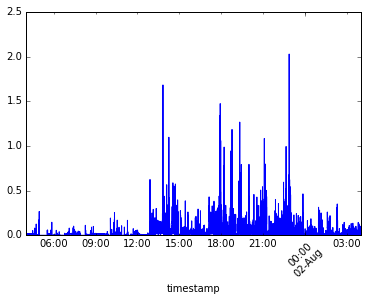

In [6]:
data['acceleration'].plot()
xticks(rotation=45);

In [7]:
data['temperature'] = data['acceleration']
data['date_time'] = data.index

In [8]:
data.to_json(path_or_buf='eEcology-Annotation-UI-nobuild/tracker.json', orient='records')

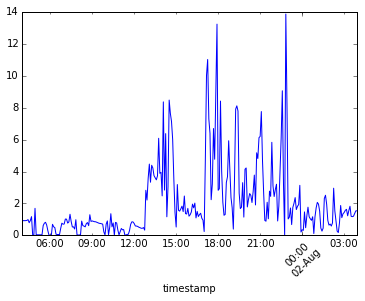

In [9]:
data_r = data.resample('5Min', how='sum')

data_r['acceleration'].plot()
xticks(rotation=45);

# Merge data from patients and annotation

In [13]:
annotations = pd.read_csv('data/vincent/data_annotations.csv')

In [14]:
fileAnnotations = annotations[annotations['filename']=='__016563_2014-08-08 12-02-19.bin_day1.RData']

In [ ]:
for row in fileAnnotations[['ddate1', 'stime', 'etime', 'activity', 'filename']].as_matrix():
    rStartStr = row[0].strip() + ' ' + row[1].strip()
    rStart = dt.datetime.strptime(rStartStr, '%d/%m/%Y %H:%M:%S')

    rEndStr = row[0].strip() + ' ' + row[2].strip()
    rEnd = dt.datetime.strptime(rEndStr, '%d/%m/%Y %H:%M:%S')

    data.loc[(data.index < rEnd) & (data.index > rStart), 'Activity'] = row[3]

In [17]:
def loadData(name):
    try:
        name = name.replace('RData', 'csv')
        filename = 'data/vincent/accelerometer_5second/' + name
        data = pd.read_csv(filename, index_col='timestamp', parse_dates=True)
        return data
    except:
        # print 'Fine not found: ',name
        return None

In [18]:
def parseDate(dateStr):
    try:
        return dt.datetime.strptime(dateStr, '%d/%m/%Y %H:%M:%S')
    except:
        # hack -- 
        dateStr = dateStr.replace('24:','00:')
        dateStr = dateStr.replace('25:','01:')
        dateStr = dateStr.replace('27:','03:')
        return dt.datetime.strptime(dateStr, '%d/%m/%Y %H:%M:%S')

def addAnnotations(data, fileAnnotations):
    for row in fileAnnotations[['ddate1', 'stime', 'etime', 'activity', 'filename']].as_matrix():
        rStart = parseDate(row[0].strip() + ' ' + row[1].strip())
        rEnd   = parseDate(row[0].strip() + ' ' + row[2].strip())
        data.loc[(data.index < rEnd) & (data.index > rStart), 'Activity'] = row[3]
        
    return data

In [19]:
byName = annotations.groupby('filename')
for name, fileAnnotations in byName:
    # Load data
    df = loadData(name)
    
    if df is not None:    
        # Add annotations
        df = addAnnotations(df, fileAnnotations)

        # Save file
        df.to_csv('data/vincent/merged/' + name.replace('RData','csv'))

# Load data from asimilated patients

In [20]:
# filename = 'data/vincent/merged/__016570_2014-08-12 15-23-30.bin_day1.csv'
filename = 'data/vincent/merged/__018643_2014-07-30 15-07-46.bin_day1.csv'
df = pd.read_csv(filename, index_col='timestamp', parse_dates=True)

In [21]:
df.head(5)

,acceleration,anglex,angley,anglez,invalid,Activity
timestamp,,,,,,
2014-07-23 04:00:00,0.004112,-78.420989,6.355486,-9.638339,0,NaN
2014-07-23 04:00:05,0.003581,-78.404221,6.386509,-9.637757,0,Sleepingandresting(includingsickinbed)
2014-07-23 04:00:10,0.004212,-78.389250,6.414209,-9.637237,0,Sleepingandresting(includingsickinbed)
2014-07-23 04:00:15,0.004123,-78.478347,6.242389,-9.644912,0,Sleepingandresting(includingsickinbed)
2014-07-23 04:00:20,0.003927,-78.395513,6.400891,-9.638600,0,Sleepingandresting(includingsickinbed)


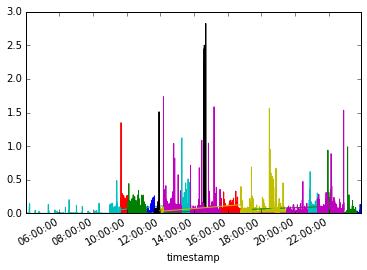

In [12]:
byAct = df.groupby('Activity')
for act,dfa in byAct:
    dfa['acceleration'].plot(label=act)
#legend();

In [15]:
df['datetime'] = df.index
df['datetime'] = df['datetime'].apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))
df.to_json('user2.json', orient='records')
#df.head(10).to_json(orient='records')

# Merge data from all

In [22]:
from glob import glob

In [23]:
def shiftTS(df, startTime):
    myMin = df['timestamp'].min()
    df['delta'] = df['timestamp'] - myMin
    df['timestamp'] = df['delta'] + startTime
    return df

In [54]:
mergedDF = None
for filename in glob('data/vincent/merged/*.csv'):
    df = pd.read_csv(filename, parse_dates=['timestamp'])
    if mergedDF is None:
        mergedDF = df
    else:
        shiftTS(df, mergedDF['timestamp'].max())
        mergedDF = pd.concat([mergedDF, df])

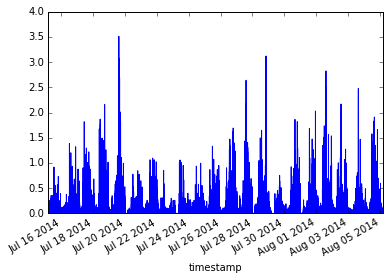

In [55]:
mergedDF = mergedDF.set_index('timestamp')
mergedDF['acceleration'].plot()
mergedDF['datetime'] = mergedDF.index

In [56]:
mergedDF.head(5)

,Activity,acceleration,anglex,angley,anglez,delta,invalid,datetime
timestamp,,,,,,,,
2014-07-15 04:00:00,"WatchTV,DVDs,downloadedvideos",0.001139,-52.219093,31.982310,-17.932031,NaT,0,2014-07-15 04:00:00
2014-07-15 04:00:05,"WatchTV,DVDs,downloadedvideos",0.001413,-52.169288,32.041719,-17.923120,NaT,0,2014-07-15 04:00:05
2014-07-15 04:00:10,"WatchTV,DVDs,downloadedvideos",0.001318,-52.246065,31.960574,-17.920761,NaT,0,2014-07-15 04:00:10
2014-07-15 04:00:15,"WatchTV,DVDs,downloadedvideos",0.001349,-52.181592,32.028817,-17.922608,NaT,0,2014-07-15 04:00:15
2014-07-15 04:00:20,"WatchTV,DVDs,downloadedvideos",0.001737,-52.270592,31.950930,-17.894898,NaT,0,2014-07-15 04:00:20


In [74]:
# mergedDF = mergedDF.resample('1Min')
rs = mergedDF.resample('1Min')
pd.concat([rs, mergedDF], join_axes=[ rs.index, mergedDF.index ])

AssertionError: length of join_axes must not be equal to 1

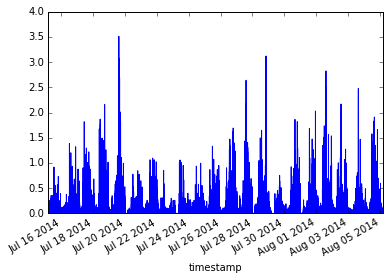

In [61]:
mergedDF['acceleration'].plot()

In [39]:
mergedDF.head(5)

,acceleration,anglex,angley,anglez,invalid
timestamp,,,,,
2014-07-15 04:00:00,0.001374,-52.217821,31.994375,-17.915532,0
2014-07-15 04:01:00,0.001357,-52.248440,31.966499,-17.907713,0
2014-07-15 04:02:00,0.001200,-52.320197,32.002585,-17.732016,0
2014-07-15 04:03:00,0.001161,-52.477915,32.043725,-17.403591,0
2014-07-15 04:04:00,0.001214,-52.537169,31.983811,-17.397668,0


In [62]:
mergedDF.to_json('sensor3.json', orient='records')

In [97]:
mergedDF.to_csv('sensor3.csv')

# Import data from carlos

In [3]:
import datetime as dt

In [23]:
datafile2 = 'data/carlos/Cycling1.csv'
df = pd.read_csv(datafile2, skiprows=2, sep='\t')

In [37]:
with open(datafile2) as fin:
    line = fin.readline()
parts = line.split('\t')
offsetStr = parts[0]
offset = dt.datetime.strptime(offsetStr, '%Y-%m-%d %H:%M:%S'),

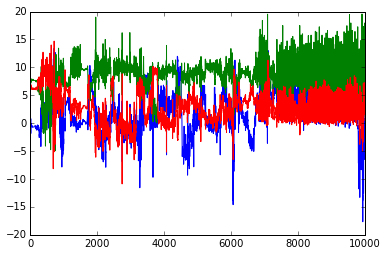

In [47]:
df['X'].plot()
df['Y'].plot()
df['Z'].plot()

# Lars data

In [11]:
data = pd.read_csv('../ms-vis/data/lars.accelerometor.txt', skiprows=8, skip_footer=2, sep=' ')
data.columns = [ 'X', 'Y', 'Z', 'Delta']

In [12]:
data['Delta']

,X,Y,Z,Delta
0,0.064,-0.121,0.120,201
1,0.044,-0.083,0.000,201
2,0.094,-0.256,0.257,202
3,-0.058,-0.094,0.065,201
4,-0.004,-0.207,0.168,202
5,-0.110,-0.308,0.236,201
6,-0.288,-0.183,0.402,202
7,-0.489,0.203,-0.225,201
8,0.080,0.171,-0.517,201
9,0.191,0.416,0.128,202
